In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [7]:
train_path = '/kaggle/input/waste-classification-data/DATASET/TRAIN'
test_path = '/kaggle/input/waste-classification-data/DATASET/TEST'

In [8]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [13]:
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:47<00:00, 266.19it/s]


In [14]:
data.shape

(22564, 2)

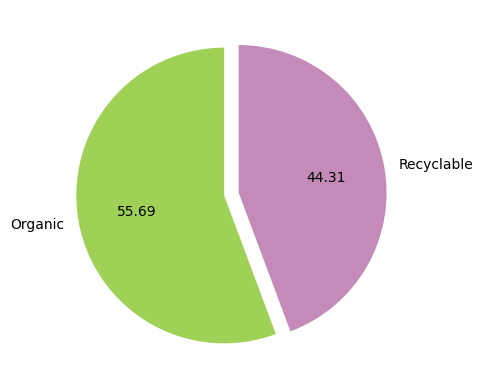

In [17]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'],autopct='%0.2f',colors=colors,startangle=90,explode=[0.05,0.05])
plt.show()

In [18]:
img_size = (150, 150)
x_data_resized = [cv2.resize(img, img_size) for img in x_data]
x_data_normalized = np.array(x_data_resized) / 255.0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_data_encoded = encoder.fit_transform(y_data)
from tensorflow.keras.utils import to_categorical
y_data_one_hot = to_categorical(y_data_encoded)
print("Preprocessed data shapes:")
print(f"x_data: {x_data_normalized.shape}, y_data: {y_data_one_hot.shape}")


Preprocessed data shapes:
x_data: (22564, 150, 150, 3), y_data: (22564, 2)
